In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 
from networkx.algorithms import community
import pickle
import csv
#import chart_studio.plotly as py
#from plotly.graph_objs import *
import re
import string

In [2]:
#Parking

In [3]:
df_parking = pd.read_csv('parking_from_january.csv') 

In [4]:
df_parking.columns

Index(['time', 'user_id', 'username', 'text', 'retweets', 'favorites',
       'tweet_hashtags', 'location', 'user_id_str'],
      dtype='object')

In [5]:
df_parking["time"] = df_parking["time"].astype("datetime64")

In [6]:
newdf_parking = df_parking[['time']].copy()

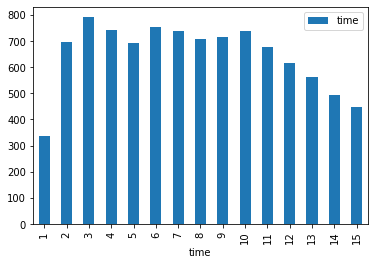

In [7]:
newdf_parking.groupby(newdf_parking["time"].dt.week).count().plot(kind="bar")

In [11]:
#ParkingGarage

In [12]:
df_parkinggarage = pd.read_csv('parkinggarage_from_january.csv') 
df_parkinggarage["time"] = df_parkinggarage["time"].astype("datetime64")

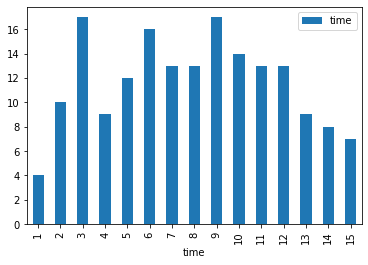

In [14]:
df_parkinggarage.groupby(df_parkinggarage["time"].dt.week).count().plot(kind="bar")

In [17]:
df_parkinglot= pd.read_csv('parkinglot_from_january.csv') 
df_parkinglot["time"] = df_parkinglot["time"].astype("datetime64")

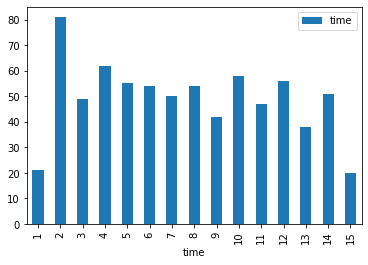

In [18]:
df_parkinglot = df_parkinglot[['time']].copy()
df_parkinglot.groupby(df_parkinglot["time"].dt.week).count().plot(kind="bar")

In [20]:
#######################################

Clustring Coefficient..... the time evolution of the clustering coefficient in a selected time interval (Each 15 days )

In [21]:
DF = pd.read_csv('all_hashtags_combined.csv') 

In [22]:
DF.columns

Index(['time', 'user_id', 'username', 'text', 'retweets', 'favorites',
       'tweet_hashtags', 'location', 'user_id_str'],
      dtype='object')

In [23]:
DF_new = DF[['time', 'user_id']].copy()

In [24]:
DF_new["time"] = DF_new["time"].astype("datetime64")

In [25]:
DF_new["time"]

0       2020-04-11 11:37:20
1       2020-04-11 11:29:11
2       2020-04-11 11:05:26
3       2020-04-11 11:03:18
4       2020-04-11 10:30:50
                ...        
10545   2020-01-06 05:42:47
10546   2020-01-03 23:25:35
10547   2020-01-03 00:25:21
10548   2020-01-01 21:23:42
10549   2020-01-01 19:36:53
Name: time, Length: 10550, dtype: datetime64[ns]

In [26]:
start_date= "2020-01-01"
end_date= "2020-01-15"

In [27]:
mask = (DF_new['time'] >= start_date) & (DF_new['time'] <= end_date)

In [28]:
df1 = DF_new.loc[mask]

In [29]:
df1['time']

8443    2020-01-14 23:50:05
8444    2020-01-14 23:48:55
8445    2020-01-14 23:26:53
8446    2020-01-14 23:20:00
8447    2020-01-14 23:09:18
                ...        
10545   2020-01-06 05:42:47
10546   2020-01-03 23:25:35
10547   2020-01-03 00:25:21
10548   2020-01-01 21:23:42
10549   2020-01-01 19:36:53
Name: time, Length: 1382, dtype: datetime64[ns]

In [30]:
G = nx.read_gpickle("Our_Gragh_0.4Sim")

In [31]:
stage1=G.subgraph(df1['user_id'])

In [32]:
len(stage1.nodes())

114

In [33]:
print(f"The average clustering coefficient is {nx.average_clustering(stage1)} in Stage 1")
cluster_1=nx.average_clustering(stage1)

The average clustering coefficient is 0.20370718462823725 in Stage 1


In [34]:
start_date= "2020-01-01"
end_date= "2020-01-30"
mask2 = (DF_new['time'] >= start_date) & (DF_new['time'] <= end_date)

In [35]:
df2 = DF_new.loc[mask2]

In [36]:
stage2=G.subgraph(df2['user_id'])
len(stage2.nodes())

196

In [37]:
print(f"The average clustering coefficient is {nx.average_clustering(stage2)} in Stage 2")
cluster_2=nx.average_clustering(stage2)

The average clustering coefficient is 0.2559788850605177 in Stage 2


In [38]:
#####STAGE 3#####

In [39]:
start_date= "2020-01-01"
end_date= "2020-02-14"
mask3= (DF_new['time'] >= start_date) & (DF_new['time'] <= end_date)
df3 = DF_new.loc[mask3]

In [40]:
stage3=G.subgraph(df3['user_id'])
len(stage3.nodes())

273

In [41]:
print(f"The average clustering coefficient is {nx.average_clustering(stage3)} in Stage 3")
cluster_3=nx.average_clustering(stage3)

The average clustering coefficient is 0.30543667102969874 in Stage 3


In [42]:
#######STAGE 04  #######

In [43]:
start_date= "2020-01-01"
end_date= "2020-02-29"
mask4= (DF_new['time'] >= start_date) & (DF_new['time'] <= end_date)
df4= DF_new.loc[mask4]

In [44]:
stage4=G.subgraph(df4['user_id'])
len(stage4.nodes())

342

In [45]:
print(f"The average clustering coefficient is {nx.average_clustering(stage4)} in Stage 4")
cluster_4=nx.average_clustering(stage4)

The average clustering coefficient is 0.3199791020461648 in Stage 4


In [46]:
####### STAGE 5 #####

In [47]:
start_date= "2020-01-01"
end_date= "2020-03-15"
mask5= (DF_new['time'] >= start_date) & (DF_new['time'] <= end_date)
df5= DF_new.loc[mask5]

In [48]:
stage5=G.subgraph(df5['user_id'])
len(stage5.nodes())

403

In [49]:
print(f"The average clustering coefficient is {nx.average_clustering(stage5)} in Stage 5")
cluster_5=nx.average_clustering(stage5)

The average clustering coefficient is 0.32692721637132366 in Stage 5


In [50]:
####### STAGE 6 #####

In [51]:
start_date= "2020-01-01"
end_date= "2020-03-30"
mask6= (DF_new['time'] >= start_date) & (DF_new['time'] <= end_date)
df6= DF_new.loc[mask6]

In [52]:
stage6=G.subgraph(df6['user_id'])
len(stage6.nodes())

462

In [53]:
print(f"The average clustering coefficient is {nx.average_clustering(stage6)} in Stage 6")
cluster_6=nx.average_clustering(stage6)

The average clustering coefficient is 0.3261964241919069 in Stage 6


In [54]:
####### STAGE 7 #####

In [55]:
start_date= "2020-01-01"
end_date= "2020-04-11"
mask7= (DF_new['time'] >= start_date) & (DF_new['time'] <= end_date)
df7= DF_new.loc[mask7]

In [56]:
stage7=G.subgraph(df7['user_id'])
len(stage7.nodes())

530

In [57]:
print(f"The average clustering coefficient is {nx.average_clustering(stage7)} in Stage 7")
cluster_7=nx.average_clustering(stage7)

The average clustering coefficient is 0.3547657170818124 in Stage 7


In [58]:
list_clusters=[cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7]
x_labels = [' ', '2020_01_15', '2020_01_30', '2020_02_14', '2020_02_29', '2020_03_15', '2020_03_30','2020_04_11']

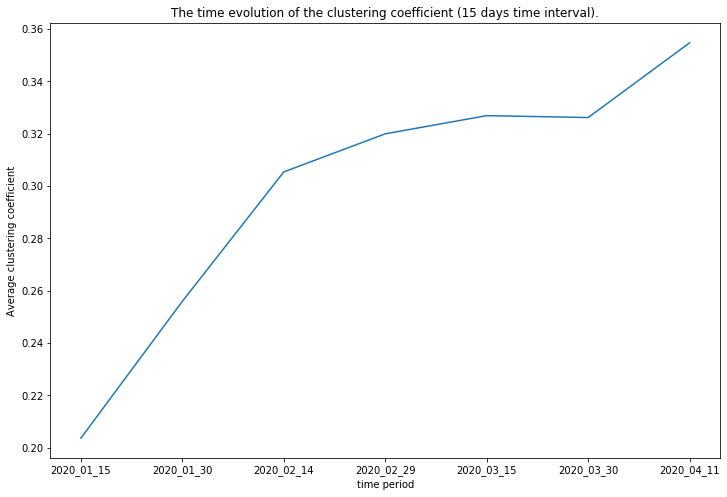

In [64]:
freq_cluster = pd.Series(list_clusters)
#freq_cluster = pd.Series.from_array(list_clusters)
plt.figure(figsize=(12, 8))
ax = freq_cluster.plot(kind='line')
ax.set_title('The time evolution of the clustering coefficient (15 days time interval).')
ax.set_xlabel('time period')
ax.set_ylabel('Average clustering coefficient')
ax.set_xticklabels(x_labels)
# Make some labels.
plt.savefig('time_evolution_of_clustering_coefficient.png')

In [ ]:
#Combining all the BAR PLOTS of number of tweets of the three hashtags

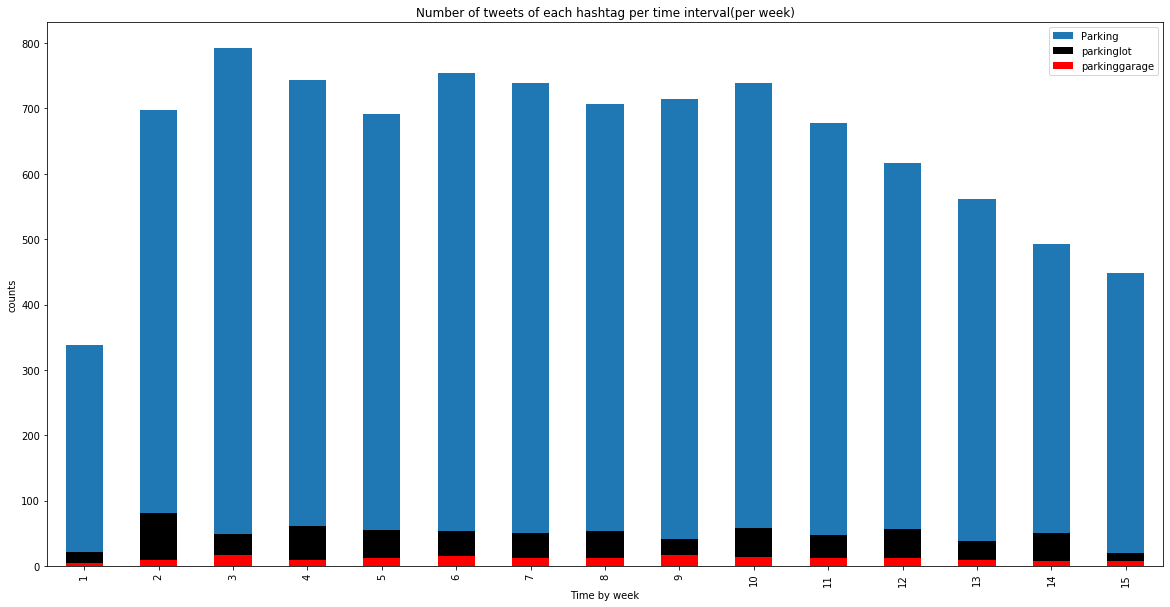

In [60]:
fig, ax = plt.subplots(figsize=(20,10))
newdf_parking.groupby(newdf_parking["time"].dt.week).count().plot(kind="bar",  ax=ax)
df_parkinglot.groupby(df_parkinglot["time"].dt.week).count().plot(kind="bar", color='black', ax=ax)
df_parkinggarage.groupby(df_parkinggarage["time"].dt.week).count().plot(kind="bar", color="red",ax=ax)
ax.legend(["Parking", "parkinglot","parkinggarage" ])
ax.set_ylabel('counts')
ax.set_xlabel('Time by week')
ax.set_title('Number of tweets of each hashtag per time interval(per week)')
fig.savefig('Number of tweets of each hashtag per time interval(per week).png')